# Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

3. ¿Cuál es la distribución de los clientes por provincia o estado?

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

### Importamos las librerías que necesitamos

In [12]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
from src import support as sp

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
# Cargamos los datos generados en la Fase 1
df_activity = pd.read_csv('../data/df_activity.csv', index_col=0)
df_history = pd.read_csv('../data/df_history.csv', index_col=0)
df_combined = pd.read_csv('../data/df_combined.csv', index_col=0)

In [4]:
# Verificamos que los datos se han cargado correctamente
df_activity.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df_history.head()

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [6]:
df_combined.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [7]:
# Agrupamos por 'Year' y 'Month' y sumamos la cantidad de vuelos reservados
monthly_flights = df_activity.groupby(['year', 'month'])['flights_booked'].sum().reset_index()
monthly_flights

,year,month,flights_booked
0,2017,1,47408
1,2017,2,47254
2,2017,3,63662
3,2017,4,55239
4,2017,5,64609
5,2017,6,79704
6,2017,7,88441
7,2017,8,77852
8,2017,9,62611
9,2017,10,59761


In [8]:
# Configuramos los meses para que se muestren correctamente en la gráfica
monthly_flights['month'] = pd.Categorical(monthly_flights['month'], categories=list(range(1, 13)), ordered=True) # Pasamos los parámetros: columna, lista de categorias y ordered True para que mantenga el orden
monthly_flights.info() # Vemos que el tipo de dato en month ha cambiado a categorico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            24 non-null     int64   
 1   month           24 non-null     category
 2   flights_booked  24 non-null     int64   
dtypes: category(1), int64(2)
memory usage: 936.0 bytes


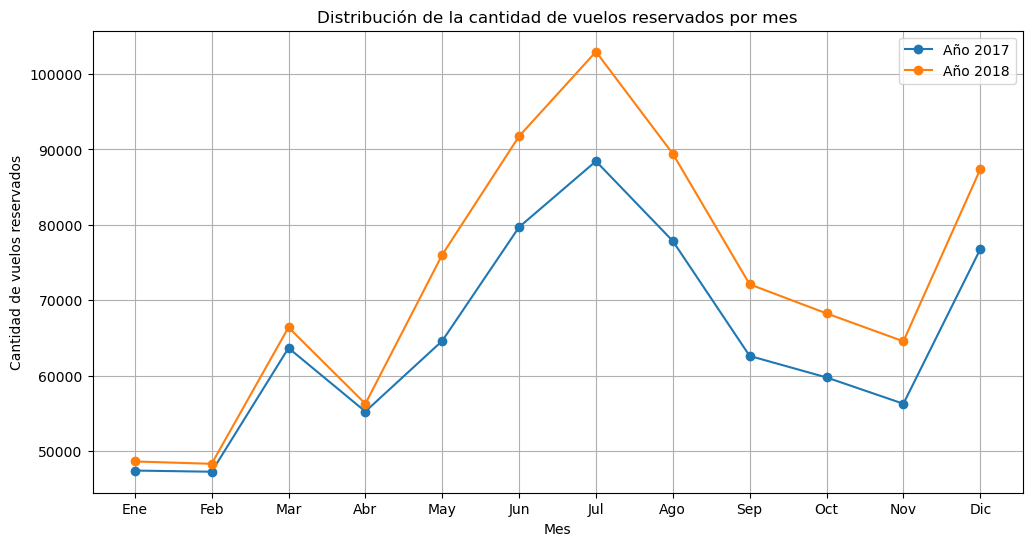

In [9]:
# Graficamos la cantidad de vuelos reservados por mes durante el año
plt.figure(figsize=(12, 6))
for year in monthly_flights['year'].unique():
    subset = monthly_flights[monthly_flights['year'] == year]
    plt.plot(subset['month'], subset['flights_booked'], marker='o', label=f'Año {year}')

plt.title('Distribución de la cantidad de vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.xticks(ticks=list(range(1, 13)), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.grid(True)
plt.show()

Vemos que hay un aumento significativo de las reservas de vuelos en los meses de mayo a septiembre, siendo julio y diciembre los meses con mayor cantidad de reservas. 

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [10]:
df_activity.head(2) # Recordemos los nombres de las variables

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


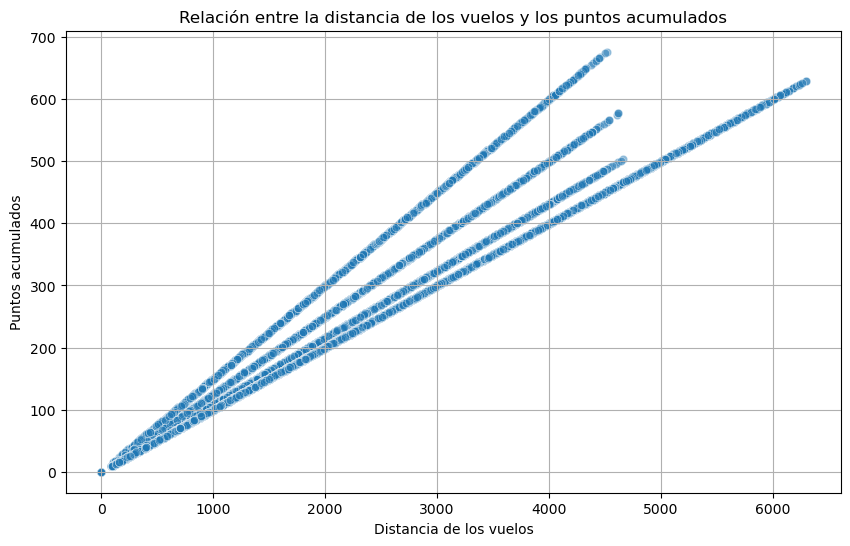

In [11]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 6))

# Creamos el scatterplot
sns.scatterplot(x='distance', y='points_accumulated', data=df_activity, alpha=0.5)

# Añadimos el título y las etiquetas de los ejes
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados')
plt.xlabel('Distancia de los vuelos')
plt.ylabel('Puntos acumulados')

# Mostramos la gráfica
plt.grid(True)
plt.show()


Parece que la distancia y los puntos acumulados están fuertemente relacionados, pero vamos a confirmar esta correlación e intentar explicar estas 4 líneas ascendentes. 

In [14]:
# Usamos el alias sp que nos hemos importado 
result = sp.identify_correlations(df_activity) # LLamamos a la función que identifica las correlaciones entre variables numericas, que es el caso de distance y points_accumulated

In [15]:
# Ya sabiendo que esta función devuelve un diccionario, vamos a explorar las keys
result.keys()

dict_keys(['spearman'])

In [21]:
# Vemos que la función uso el método spearman, ya que las relaciones entre las variables no son lineales. Esto se comprobó con la función identify_linearity.
result['spearman'] # Este es el DataFrame que nos devuelve la función, como valor de la clave spearman, es un DataFrame de correlaciones

,total_flights,dollar_cost_points_redeemed,month,year,flights_with_companions,points_accumulated,points_redeemed,flights_booked,loyalty_number,distance
total_flights,1.000000,0.264357,0.071022,0.058024,0.671438,0.900454,0.264357,0.987692,-0.003157,0.903051
dollar_cost_points_redeemed,0.264357,1.000000,0.011431,0.017002,0.399397,0.238582,0.999999,0.223765,0.000068,0.238696
month,0.071022,0.011431,1.000000,0.000000,0.048163,0.052575,0.011432,0.067924,0.000000,0.066437
year,0.058024,0.017002,0.000000,1.000000,0.030756,0.076625,0.017006,0.059768,0.000000,0.064502
flights_with_companions,0.671438,0.399397,0.048163,0.030756,1.000000,0.580288,0.399397,0.562819,-0.002597,0.582402
points_accumulated,0.900454,0.238582,0.052575,0.076625,0.580288,1.000000,0.238583,0.896711,-0.002532,0.998068
points_redeemed,0.264357,0.999999,0.011432,0.017006,0.399397,0.238583,1.000000,0.223764,0.000069,0.238697
flights_booked,0.987692,0.223765,0.067924,0.059768,0.562819,0.896711,0.223764,1.000000,-0.002876,0.899014
loyalty_number,-0.003157,0.000068,0.000000,0.000000,-0.002597,-0.002532,0.000069,-0.002876,1.000000,-0.002586
distance,0.903051,0.238696,0.066437,0.064502,0.582402,0.998068,0.238697,0.899014,-0.002586,1.000000


In [22]:
sp.classify_correlations(result['spearman']) # Vamos a clasificar esas correlaciones

Weak Correlations:
Between total_flights and dollar_cost_points_redeemed: 0.26
Between total_flights and points_redeemed: 0.26
Between dollar_cost_points_redeemed and points_accumulated: 0.24
Between dollar_cost_points_redeemed and flights_booked: 0.22
Between dollar_cost_points_redeemed and distance: 0.24
Between points_accumulated and points_redeemed: 0.24
Between points_redeemed and flights_booked: 0.22
Between points_redeemed and distance: 0.24

Moderate Correlations:
Between total_flights and flights_with_companions: 0.67
Between dollar_cost_points_redeemed and flights_with_companions: 0.40
Between flights_with_companions and points_accumulated: 0.58
Between flights_with_companions and points_redeemed: 0.40
Between flights_with_companions and flights_booked: 0.56
Between flights_with_companions and distance: 0.58

Strong Correlations:
Between total_flights and points_accumulated: 0.90
Between total_flights and flights_booked: 0.99
Between total_flights and distance: 0.90
Between d

Como podemos observar hay una correlación máxima entre points_accumulated and distance: 1.00